In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

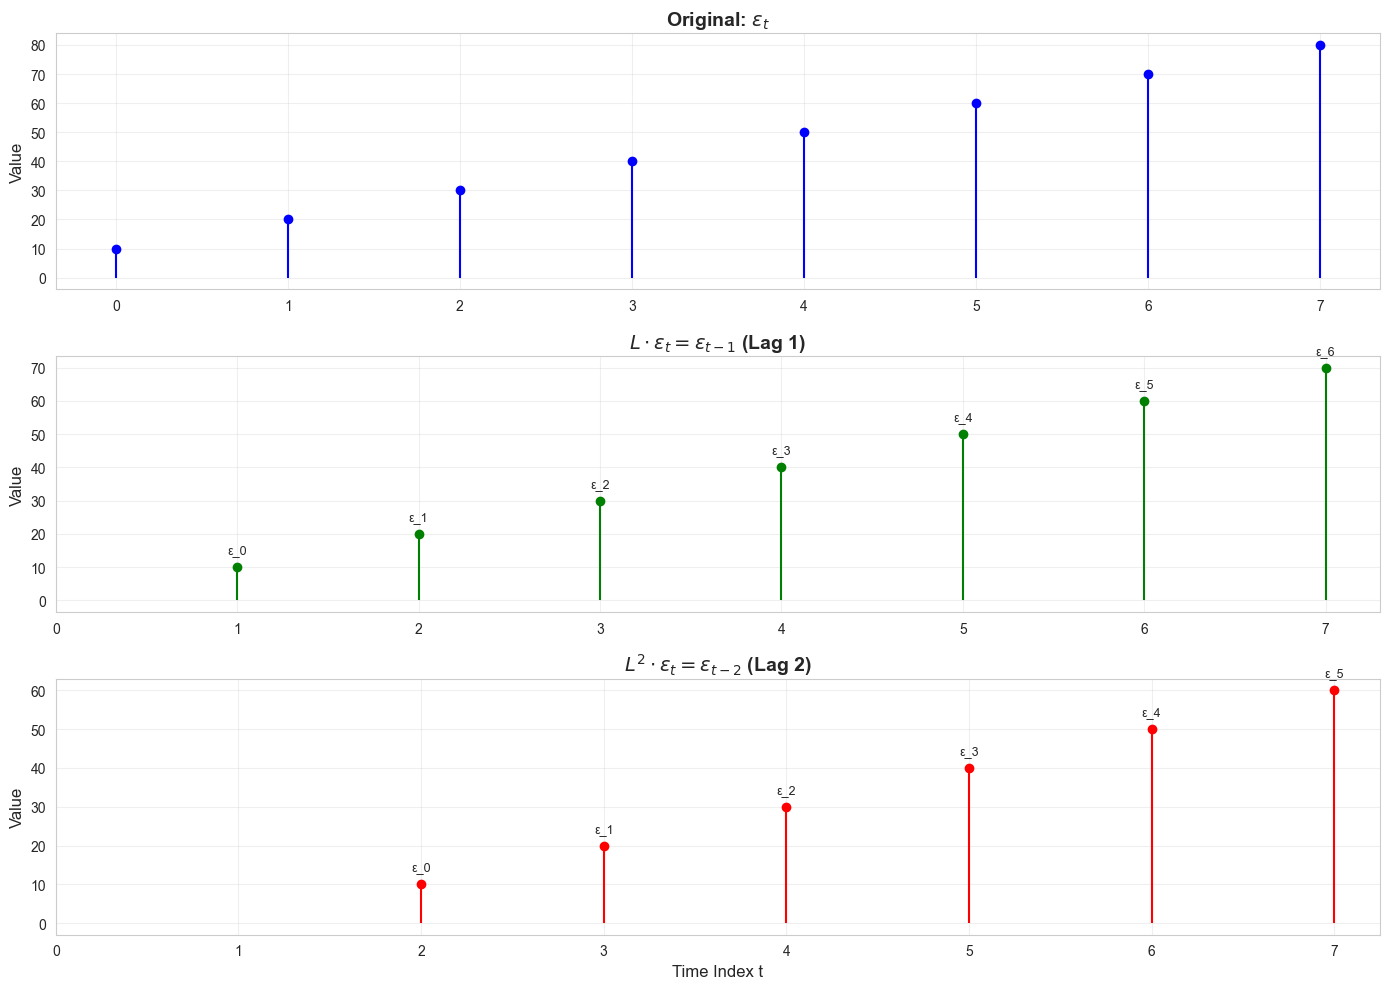

Example values:
  ε_t:     [10. 20. 30. 40. 50. 60. 70. 80.]
  L·ε_t (at t≥1):   [10. 20. 30. 40. 50. 60. 70.]  (corresponds to ε_0 through ε_6)
  L²·ε_t (at t≥2):  [10. 20. 30. 40. 50. 60.]  (corresponds to ε_0 through ε_5)

Key insight: L shifts the series backward by 1 period, L² shifts by 2 periods
Note: L·ε_t is only defined for t≥1, and L²·ε_t is only defined for t≥2


In [6]:
# Create a simple example to demonstrate the lag operator
example_eps = np.array([10, 20, 30, 40, 50, 60, 70, 80], dtype=float)
t = np.arange(len(example_eps))

# L * eps_t = eps_{t-1}
# Create lagged series - shift right by 1
L_eps_full = np.roll(example_eps, 1)  # Shift right by 1
# For L, we only have values starting from index 1
L_eps = L_eps_full[1:]  # Valid values only (no NaN needed)
t_L = t[1:]  # Corresponding time indices

# L^2 * eps_t = eps_{t-2}
# Create lagged series - shift right by 2
L2_eps_full = np.roll(example_eps, 2)  # Shift right by 2
# For L^2, we only have values starting from index 2
L2_eps = L2_eps_full[2:]  # Valid values only (no NaN needed)
t_L2 = t[2:]  # Corresponding time indices

# Create visualization
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# Original series
axes[0].stem(t, example_eps, basefmt=' ', linefmt='b-', markerfmt='bo')
axes[0].set_title('Original: $\\varepsilon_t$', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Value', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(t)

# L * eps_t = eps_{t-1}
axes[1].stem(t_L, L_eps, basefmt=' ', linefmt='g-', markerfmt='go')
axes[1].set_title('$L \\cdot \\varepsilon_t = \\varepsilon_{t-1}$ (Lag 1)', 
                  fontsize=14, fontweight='bold')
axes[1].set_ylabel('Value', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(t)
# Add annotations showing which epsilon each point represents
for i, (t_val, lag_val) in enumerate(zip(t_L, L_eps)):
    axes[1].annotate(f'ε_{t_val-1}', (t_val, lag_val), textcoords="offset points", 
                    xytext=(0,10), ha='center', fontsize=9)

# L^2 * eps_t = eps_{t-2}
axes[2].stem(t_L2, L2_eps, basefmt=' ', linefmt='r-', markerfmt='ro')
axes[2].set_title('$L^2 \\cdot \\varepsilon_t = \\varepsilon_{t-2}$ (Lag 2)', 
                  fontsize=14, fontweight='bold')
axes[2].set_xlabel('Time Index t', fontsize=12)
axes[2].set_ylabel('Value', fontsize=12)
axes[2].grid(True, alpha=0.3)
axes[2].set_xticks(t)
# Add annotations showing which epsilon each point represents
for i, (t_val, lag2_val) in enumerate(zip(t_L2, L2_eps)):
    axes[2].annotate(f'ε_{t_val-2}', (t_val, lag2_val), textcoords="offset points", 
                    xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

print("Example values:")
print(f"  ε_t:     {example_eps}")
print(f"  L·ε_t (at t≥1):   {L_eps}  (corresponds to ε_{t[0]} through ε_{t[-2]})")
print(f"  L²·ε_t (at t≥2):  {L2_eps}  (corresponds to ε_{t[0]} through ε_{t[-3]})")
print("\nKey insight: L shifts the series backward by 1 period, L² shifts by 2 periods")
print("Note: L·ε_t is only defined for t≥1, and L²·ε_t is only defined for t≥2")